In [102]:
import camb
from camb import model, initialpower
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
from matplotlib import rc
import re
import matplotlib.pyplot as plt
from scipy.integrate import quad as qd
import numpy as np

In [103]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [279]:
redshifts_values = [0];
pars.set_matter_power(redshifts=redshifts_values, kmax=2.0);

In [280]:
def PK(k, As, ns):
    return As * (((k / 0.05) ** (ns - 1)) +  (0 * (k / 0.05 )) + (0 * (((k / 0.002)**(-1))))) 
pars.set_initial_power_function(PK, args=(2e-9, 0.96));

In [281]:
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

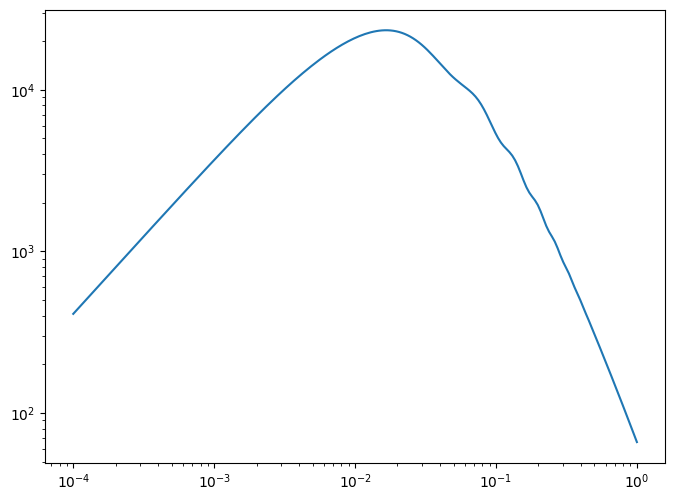

In [282]:
for i, j in enumerate(z):
    pk_v = pk[i]
    label = 'z = %s' %str(j)
    plt.loglog(kh, pk_v, label=label)
# plt.legend()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["figure.dpi"] = 100
plt.show()

In [283]:
# plt.plot(z,pk[:,50])
# plt.show()
i, = np.where(kh == 1.00000000e-04)
i[0]

0

In [284]:
w_0 = -1
w_1 = 0
omega_x = 0.65
H_0 = 67.5
c = 2.1
omega_m_0 = 0.35
omega_lambda_0 = 1
omega_k_0 = 1
omega_r_0 = 1
gamma_0 = 0.545
gamma_1 = 0
etha = 0


In [285]:
def b(z):
    return np.sqrt(1+z)

def w(z):
    return w_0 + w_1*(1/1+z)

def H(z):
    func_1 = lambda z_prime_1 : (1 + w(z_prime_1))/(1 + z_prime_1)
    integ_1 = qd(func_1,0,z)[0]
    return H_0 * np.sqrt((omega_m*(1+z)**3) + (omega_x)*np.exp(3*integ_1))

def D(z):
    func_2 = lambda z_prime_2 : 1 / H(z_prime_2)
    integ_2 = qd(func_2, 0, z)[0]
    return (c/(1+z)) * integ_2

def Omega_m(z):
    return (omega_m_0 * (1+z)**3) * (omega_lambda_0 + omega_k_0*(1+z)**2 + omega_m_0*(1+z)**3 + omega_r_0*(1+z)**4)**(-1)

def gamma(z):
    return gamma_0 + gamma_1 * (z / 1+z)

def f_g(z):
    return (Omega_m(z)**gamma(z)) * (1+etha)

def G(z):
    func_3 = lambda z_prime_3 : f_g(z_prime_3) * (1+z_prime_3)**(-1)
    integ_3 = qd(func_3, 0, z)[0]
    return integ_3
    
def betta(z):
    return f_g(z) / b(z)
    

In [286]:
def P(k, z, redshifts, KH, PK):
    z_index = redshifts.index(z)
    k_index, = np.where(KH == k)
    k_index = k_index[0]
    
    matt_pow_spec_val = PK[z_index][k_index]
    
    return matt_pow_spec_val

In [287]:
def P_obs(k, z, mu):
    r = 1
    return r * (b(z)**2) * ((1 + betta(z) * mu**2)**2) * P(k, z, redshifts_values, kh, pk)

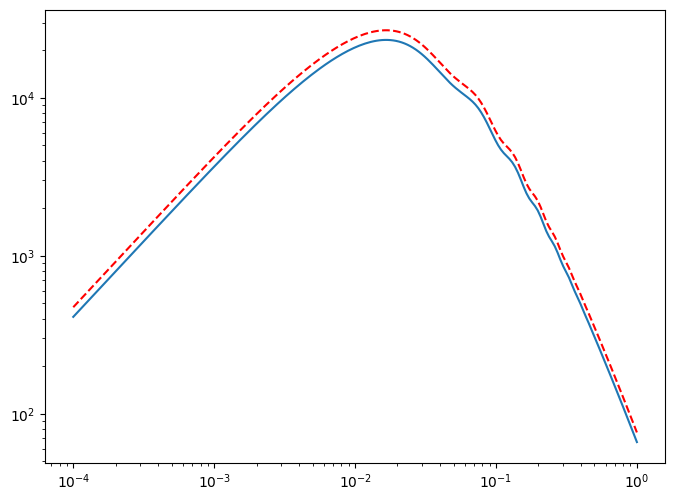

In [288]:
def p_calc(KH):
    Powers = []
    for i in KH:
        powers = P_obs(i, redshifts_values[0], 0.5)
        Powers.append(powers)
    return KH, Powers

kh, Powers = p_calc(kh)
plt.loglog(kh, Powers, 'r--', kh, pk[0])
